## Read the Data

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
happy_df= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_28765/3190235487.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  happy_df= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")


which features do we have?

In [6]:
happy_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

for better working: Changing all column-names to lower letters and no whitespaces:

In [7]:
happy_df.columns = happy_df.columns.str.replace(' ','_')
happy_df.columns = happy_df.columns.str.lower()
happy_df.head(15)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.119,0.954,0.435,0.371


In [23]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   life_ladder                       2199 non-null   float64
 3   log_gdp_per_capita                2179 non-null   float64
 4   social_support                    2186 non-null   float64
 5   healthy_life_expectancy_at_birth  2145 non-null   float64
 6   freedom_to_make_life_choices      2166 non-null   float64
 7   generosity                        2126 non-null   float64
 8   perceptions_of_corruption         2083 non-null   float64
 9   positive_affect                   2175 non-null   float64
 10  negative_affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


## Handle Null Values

How much Null Values do we have?

In [26]:
happy_df.isna().sum()

country_name                          0
year                                  0
life_ladder                           0
log_gdp_per_capita                   20
social_support                       13
healthy_life_expectancy_at_birth     54
freedom_to_make_life_choices         33
generosity                           73
perceptions_of_corruption           116
positive_affect                      24
negative_affect                      16
dtype: int64

Better visualisation with Missigno Method

In [25]:
# import missingno
import missingno as msno

<Axes: >

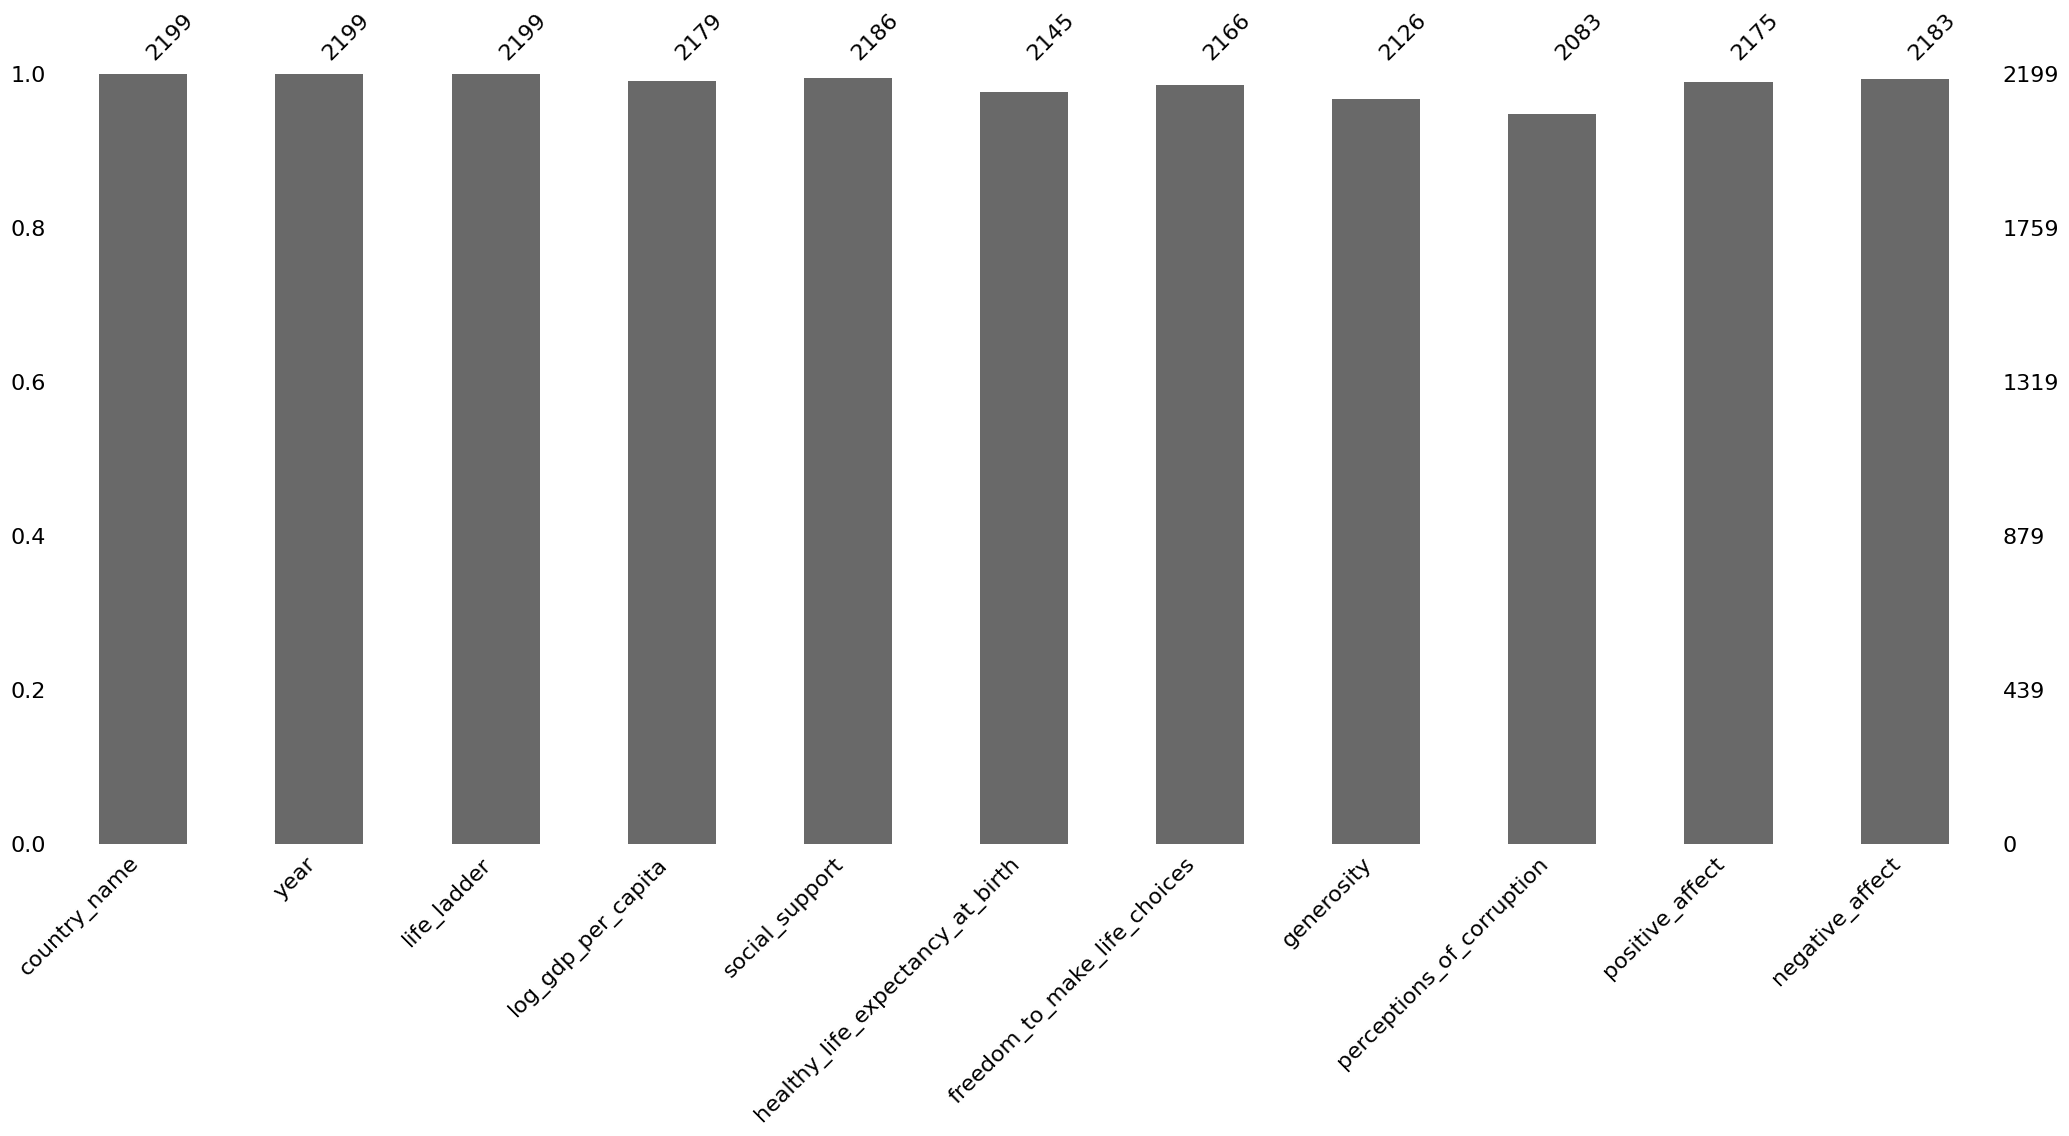

In [28]:
msno.bar(happy_df)

We have the life ladder for each country and for each year.  
But the other columns contains missing data.

<Axes: >

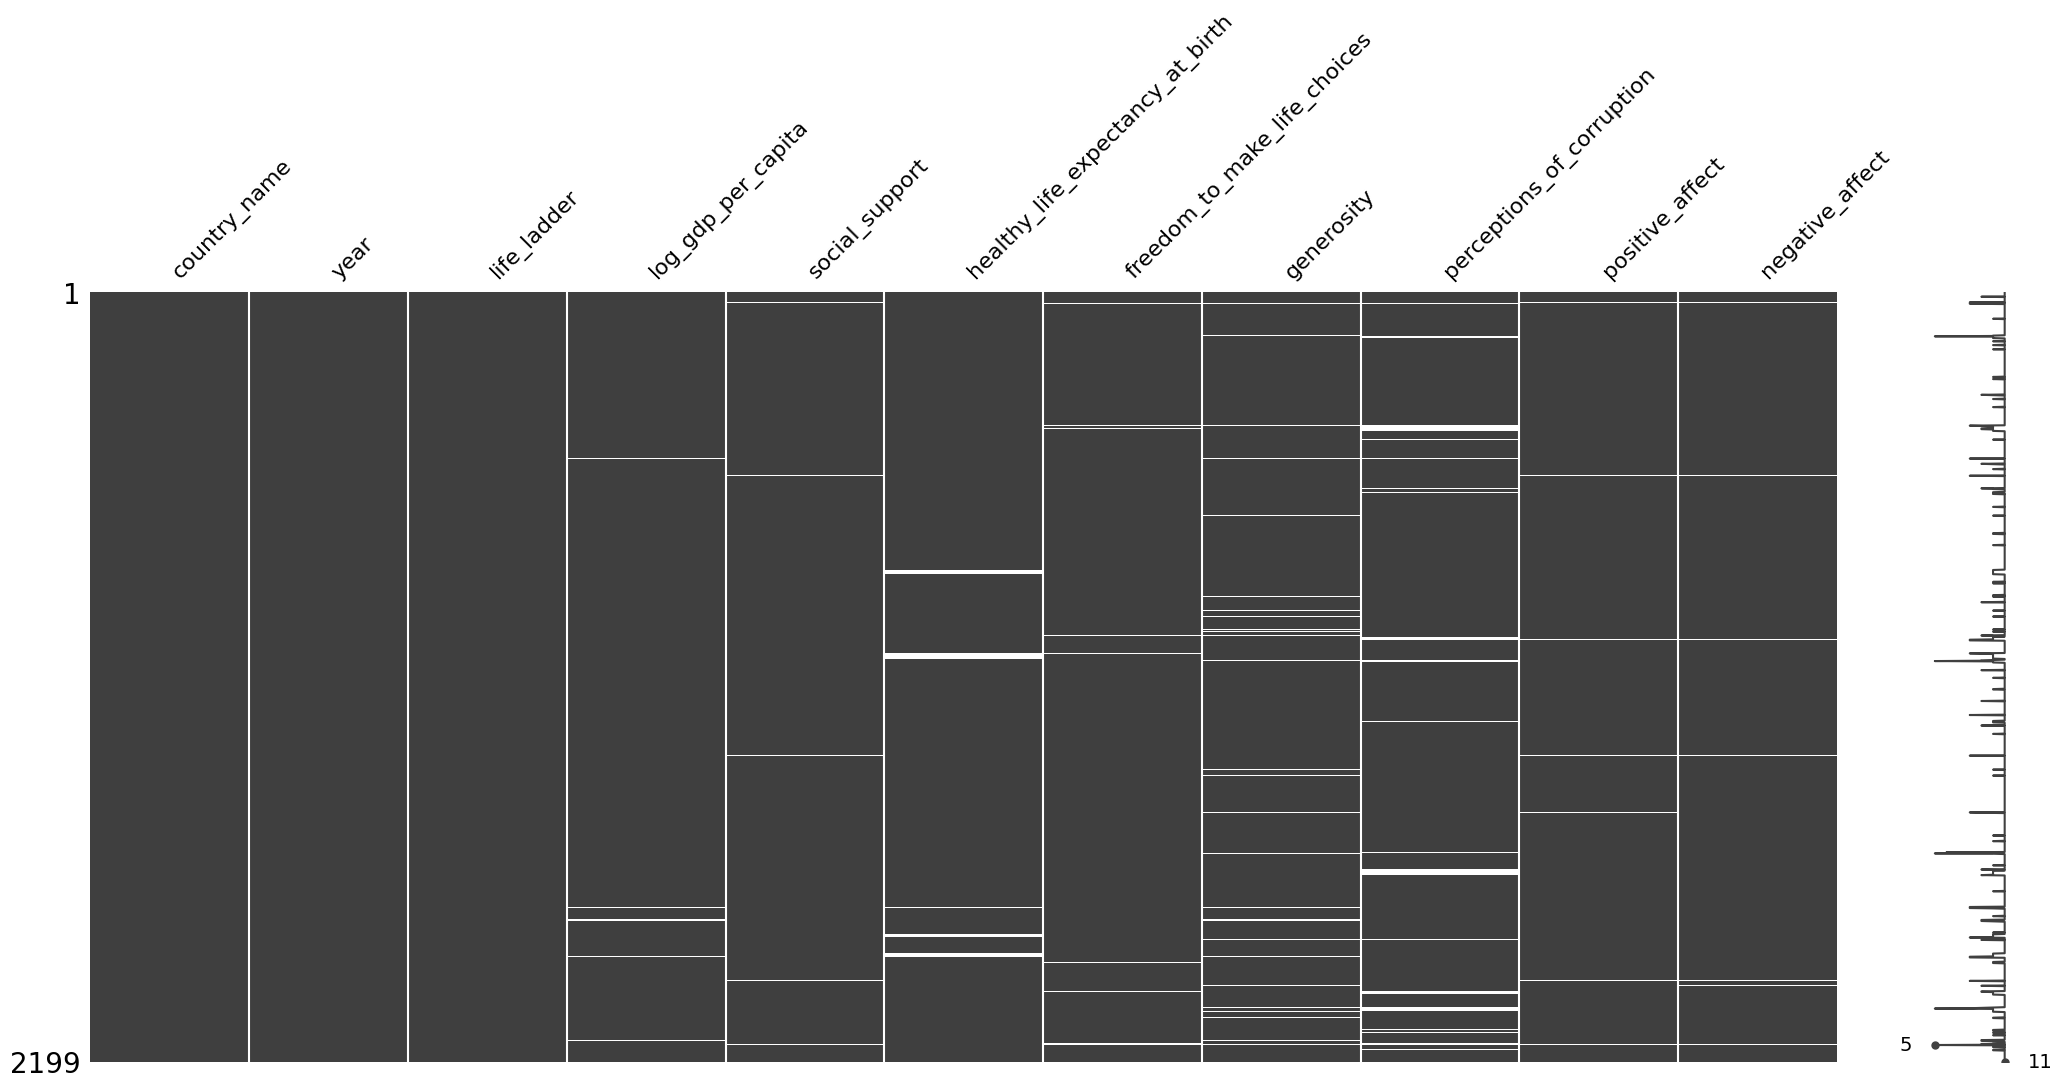

In [29]:
msno.matrix(happy_df)

We have to treat the different features with missing values differently
 

### healthy_life_expectancy_at_birth

which country misses how much entries:

In [85]:
df_exp_count = pd.DataFrame(happy_df.query('healthy_life_expectancy_at_birth.isnull()').country_name.value_counts())
df_exp_count

,count
country_name,
Kosovo,16
Hong Kong S.A.R. of China,12
Taiwan Province of China,12
State of Palestine,10
Somaliland region,4


compared with the entries for the countries:

In [86]:
df_exp_count = pd.merge(df_exp_count, happy_df.country_name.value_counts(), on =['country_name'], how = 'inner')
df_exp_count.rename(columns = {'count_x': 'NAN entries', 'count_y': 'Country entries'}, inplace = True)
df_exp_count

,NAN entries,Country entries
country_name,,
Kosovo,16,16
Hong Kong S.A.R. of China,12,12
Taiwan Province of China,12,15
State of Palestine,10,15
Somaliland region,4,4


For Taiwan and Palestine, we have more entries, we should have a look, if we can copy from them or take the mean, extrapolate or something else!  
visualisation with quick plots:

In [99]:
exp_nan_countries = happy_df.query('healthy_life_expectancy_at_birth.isnull()').country_name.unique()
exp_nan_countries

array(['Hong Kong S.A.R. of China', 'Kosovo', 'Somaliland region',
       'State of Palestine', 'Taiwan Province of China'], dtype=object)

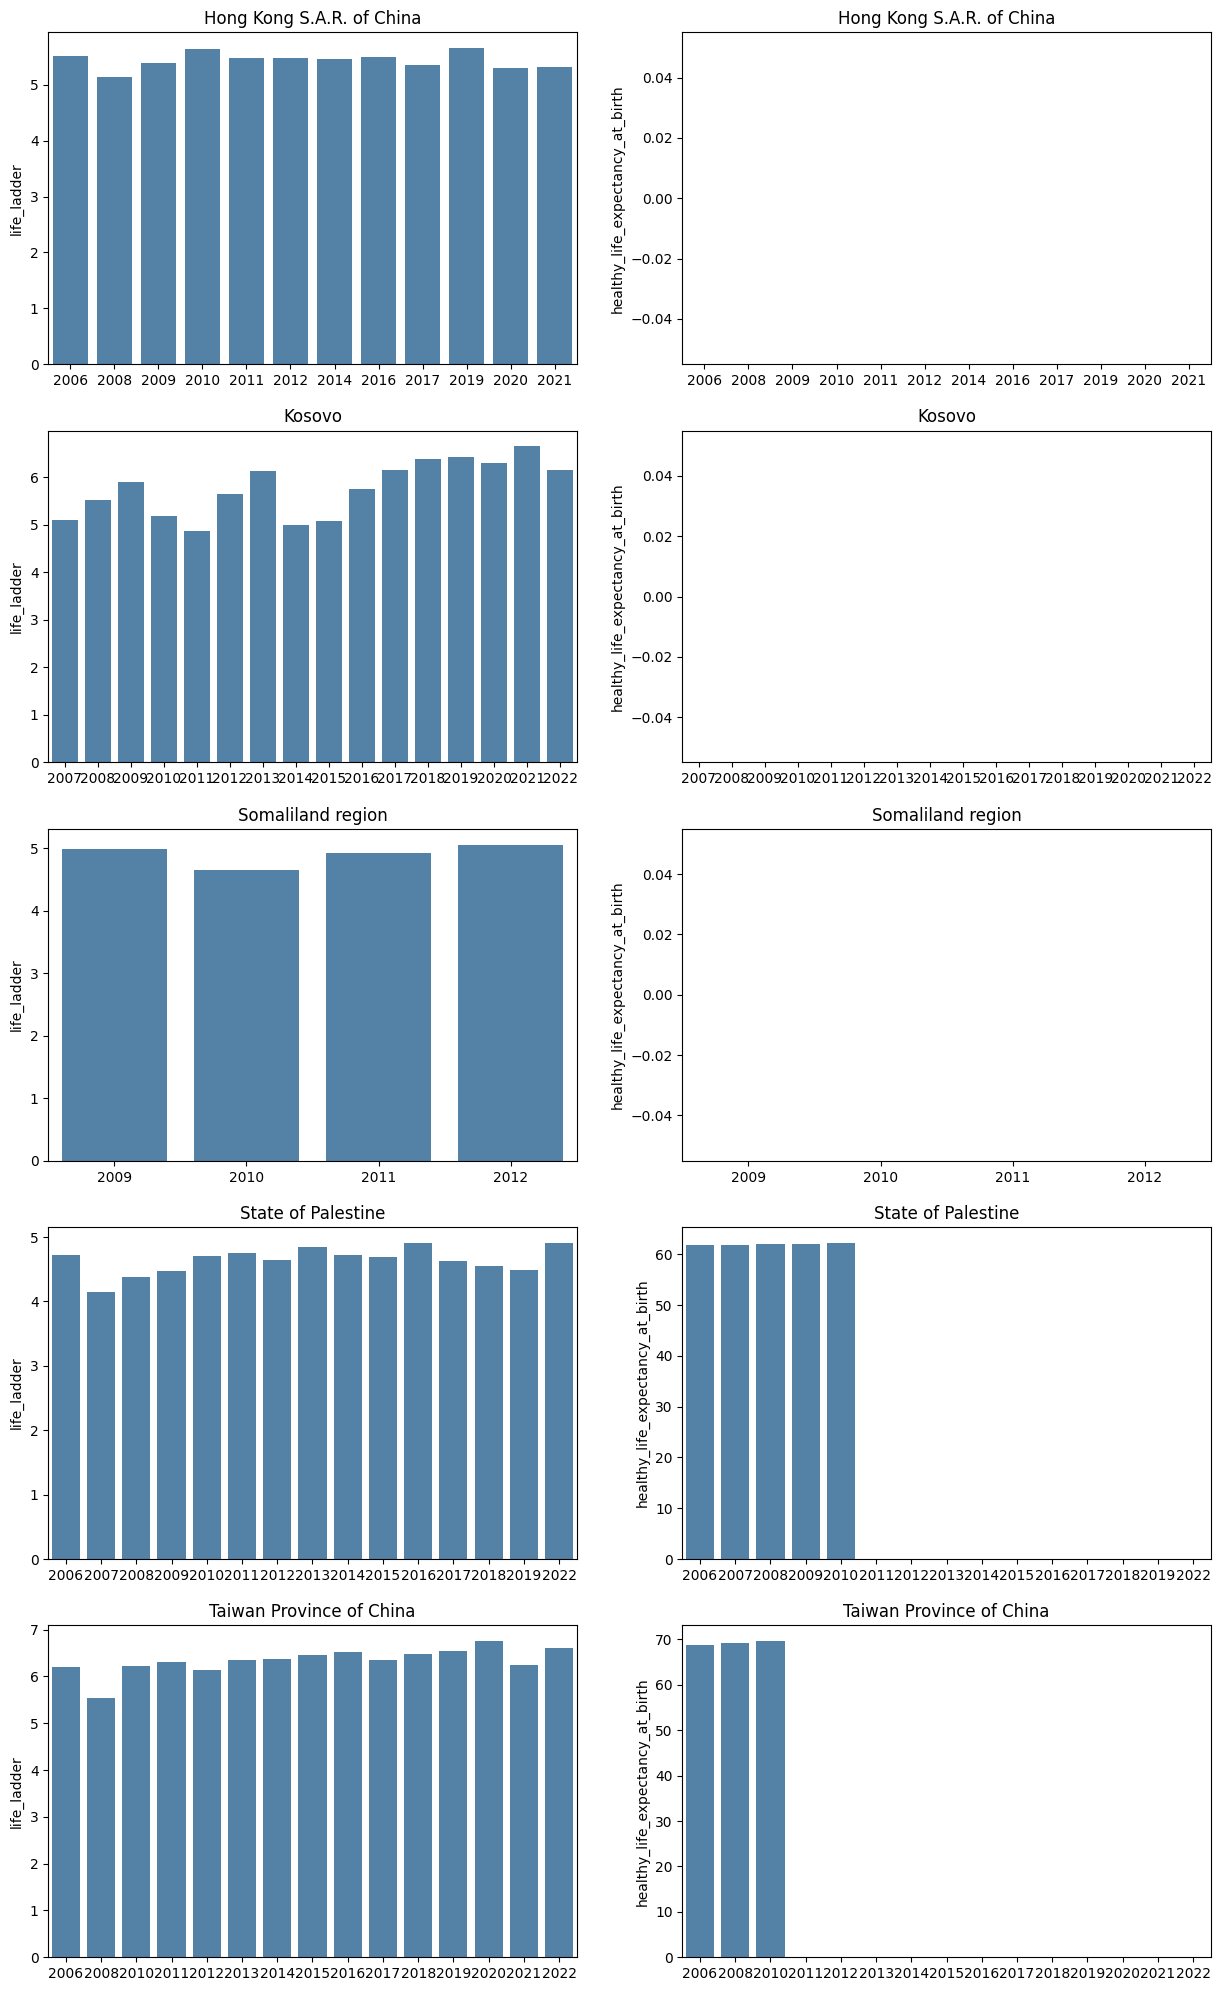

In [102]:
fig,axes = plt.subplots(5,2, figsize =(15,25))
count = 0
for item in exp_nan_countries:
    sns.barplot(data = happy_df[happy_df['country_name'] == item],
                 x = 'year', y = 'life_ladder', 
                 ax=axes[int(count)][0], color='steelblue').set(title=item, xlabel='')
    sns.barplot(data = happy_df[happy_df['country_name'] == item],
                 x = 'year', y = 'healthy_life_expectancy_at_birth', 
                 ax=axes[int(count)][1], color='steelblue').set(title=item, xlabel='')
    count += 1

### freedom_to_make_life_choices

In [87]:
df_freedom_count = pd.DataFrame(happy_df.query('freedom_to_make_life_choices.isnull()').country_name.value_counts())
df_freedom_count = pd.merge(df_freedom_count, happy_df.country_name.value_counts(), on =['country_name'], how = 'inner')
df_freedom_count.rename(columns = {'count_x': 'NAN entries', 'count_y': 'Country entries'}, inplace = True)
df_freedom_count

,NAN entries,Country entries
country_name,,
China,5,16
Tajikistan,4,16
Vietnam,3,17
Qatar,2,5
Uzbekistan,2,16
Turkmenistan,2,10
Saudi Arabia,2,17
Algeria,2,10
Jordan,2,17


For all countries, we have more entries. We will look for them an decide how we will fill the data.  
also a quick visualiation for that:

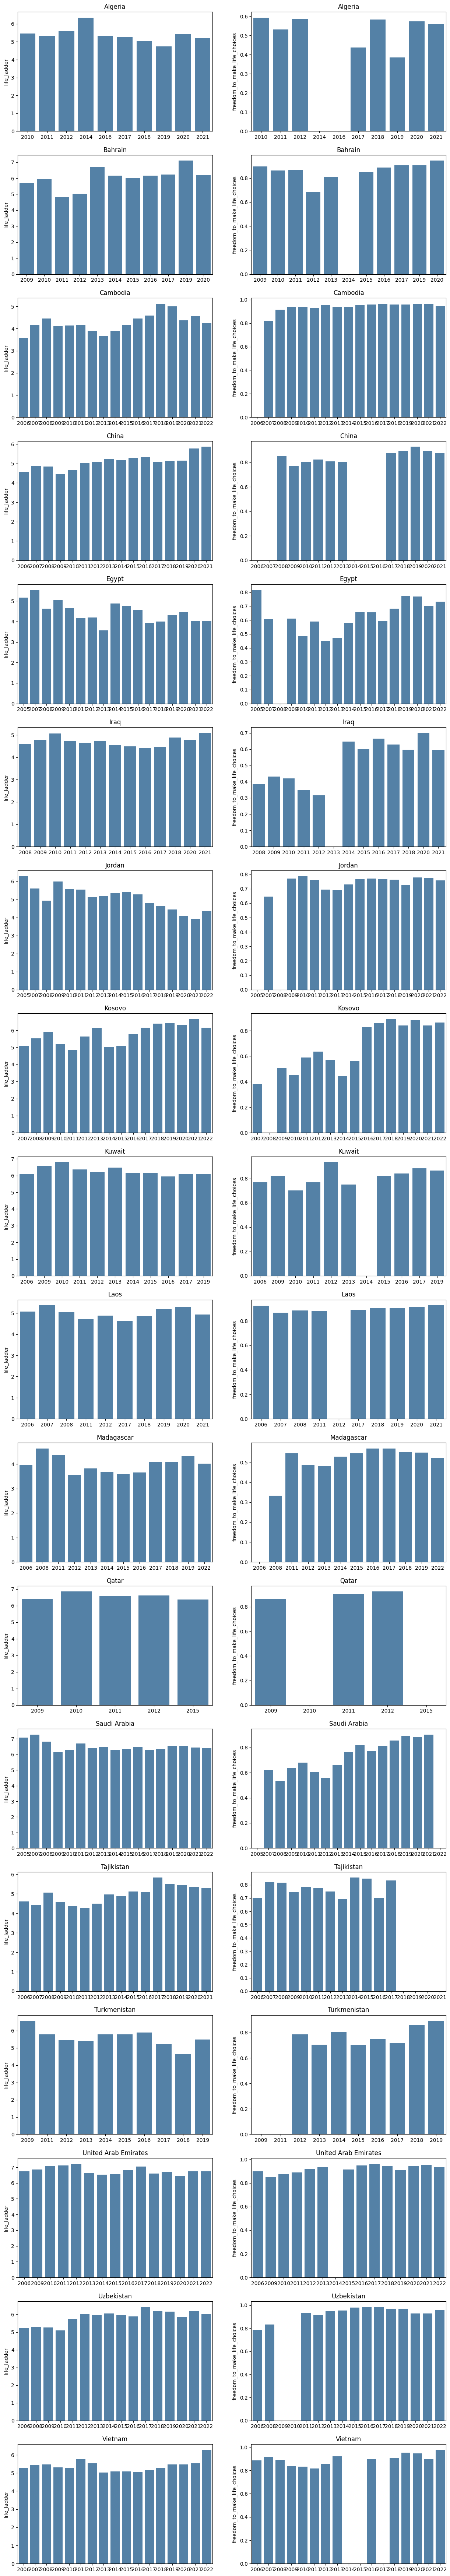

In [104]:
free_nan_countries = happy_df.query('freedom_to_make_life_choices.isnull()').country_name.unique()
fig,axes = plt.subplots(18,2, figsize =(15,90))
count = 0
for item in free_nan_countries:
    sns.barplot(data = happy_df[happy_df['country_name'] == item],
                 x = 'year', y = 'life_ladder', 
                 ax=axes[int(count)][0], color='steelblue').set(title=item, xlabel='')
    sns.barplot(data = happy_df[happy_df['country_name'] == item],
                 x = 'year', y = 'freedom_to_make_life_choices', 
                 ax=axes[int(count)][1], color='steelblue').set(title=item, xlabel='')
    count += 1

perceptions_of_corruption

In [89]:
df_corruption_count = pd.DataFrame(happy_df.query('perceptions_of_corruption.isnull()').country_name.value_counts())
df_corruption_count = pd.merge(df_corruption_count, happy_df.country_name.value_counts(), on =['country_name'], how = 'inner')
df_corruption_count.rename(columns = {'count_x': 'NAN entries', 'count_y': 'Country entries'}, inplace = True)
df_corruption_count

,NAN entries,Country entries
country_name,,
China,16,16
Saudi Arabia,14,17
United Arab Emirates,12,15
Jordan,11,17
Turkmenistan,10,10
Egypt,7,17
Kuwait,7,11
Bahrain,6,11
Malta,5,14


* China
* Turkmenistan
* Oman
* Cuba
* Maldives  
haven't any entry

Visualization:

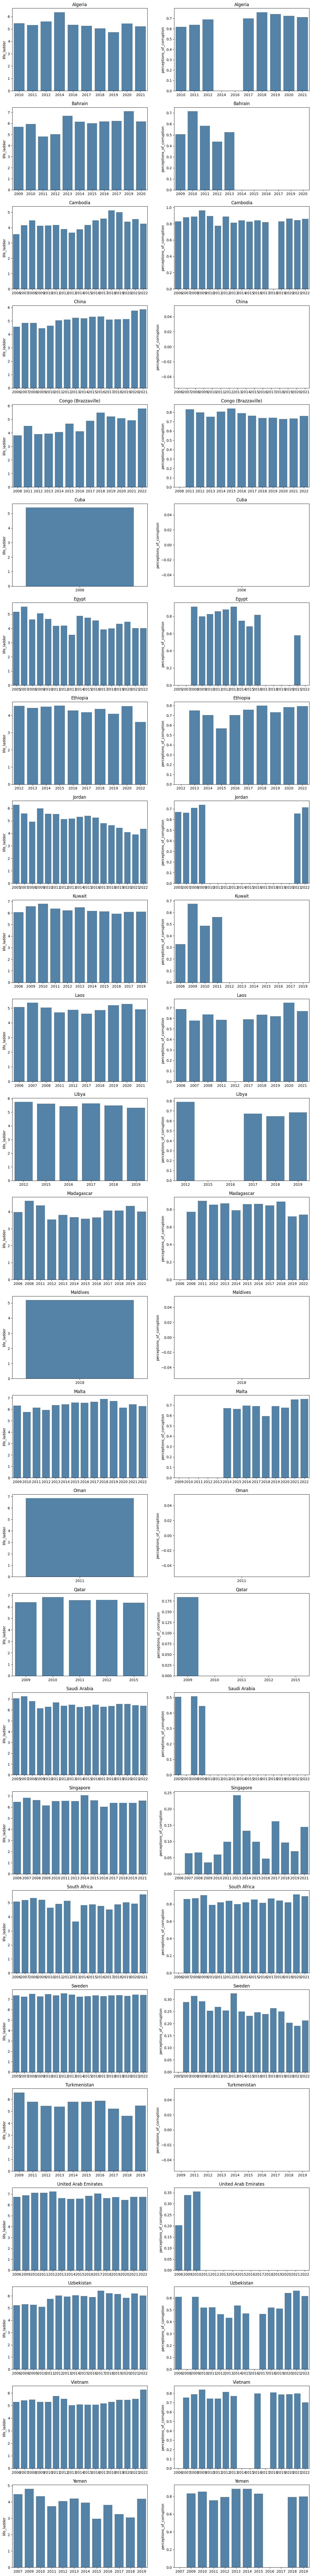

In [107]:
corrupt_nan_countries = happy_df.query('perceptions_of_corruption.isnull()').country_name.unique()
fig,axes = plt.subplots(26,2, figsize =(15,130))
count = 0
for item in corrupt_nan_countries:
    sns.barplot(data = happy_df[happy_df['country_name'] == item],
                 x = 'year', y = 'life_ladder', 
                 ax=axes[int(count)][0], color='steelblue').set(title=item, xlabel='')
    sns.barplot(data = happy_df[happy_df['country_name'] == item],
                 x = 'year', y = 'perceptions_of_corruption', 
                 ax=axes[int(count)][1], color='steelblue').set(title=item, xlabel='')
    count += 1

---

find out if we have duplicated values:

In [36]:
happy_df.duplicated().value_counts()

False    2199
Name: count, dtype: int64

great, we don't have duplicated values